### Problem Statement
You have been provided with a dataset named **`"patient_health_data.csv"`**, which includes records of various health indicators for a group of patients. The dataset comprises the following columns:

- `age:` The age of the patient.
- `bmi:` Body Mass Index of the patient.
- `blood_pressure:` The blood pressure of the patient.
- `cholesterol:` Cholesterol levels of the patient.
- `glucose:` Glucose levels of the patient.
- `insulin:` Insulin levels of the patient.
- `heart_rate:` Heart rate of the patient.
- `activity_level:` Activity level of the patient.
- `diet_quality:` Quality of diet of the patient.
- `smoking_status:` Whether the patient smokes (Yes or No).
- `alcohol_intake:` The amount of alcohol intake by the patient.
- `health_risk_score:` A composite score representing the overall health risk of a patient.

Your task is to use this dataset to build a linear regression model to predict the health risk score based on the given predictor variables. Additionally, you will use L1 (Lasso) and L2 (Ridge) regularization techniques to improve the model's performance. 

**Import Necessary Libraries**

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Task 1: Data Preparation and Exploration

1. Import the data from the **`"patient_health_data.csv"`** file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the categorical variable `'smoking_status'` by converting 'Yes' to 1 and 'No' to 0.

In [14]:
# Step 1: Import the data from the "patient_health_data.csv" file and store it in a variable 'df'
df = pd.read_csv("datasets\\patient_health_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)
print(df.describe())

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

(250, 12)
              age         bmi  blood_pressure  cholesterol     glucose  \
count  250.000000  250.000000      250.000000   250.000000  250.000000   
mean    49.832000   26.574329      130.360855   226.626053  127.226151   
std     17.411733    4.916479       28.263584    40.869293   32.824991   
min     20.000000   18.088143       80.259502   150.406635   70.026128   
25%     34.000000   22.434370      106.144688   194.314873   99.920558   
50%     49.500000   26.414415      131.249159   229.973503  127.615288   
75%     63.000000   30.476673      154.070759   261.067048  155.043461   
max     79.000000   34.961588      179.593124   299.653892  179.928885   

          insulin  heart_rate  activity_level  diet_quality  alcohol_intake  \
count  250.000000  250.000000      250.000000    250.000000      250.000000   
mean    13.693073   79.912334        5.295842      5.464092        2.515819   
std      6.607977   10.969582        2.589981      2.609052        1.418073   
min    

,age,bmi,blood_pressure,cholesterol,glucose,insulin,heart_rate,activity_level,diet_quality,smoking_status,alcohol_intake,health_risk_score
0,58,24.865215,122.347094,165.730375,149.289441,22.306844,75.866391,1.180237,7.675409,No,0.824123,150.547752
1,71,19.103168,136.852028,260.610781,158.584646,13.869817,69.481114,7.634622,8.933057,No,0.852910,160.320350
2,48,22.316562,137.592457,177.342582,178.760166,22.849816,69.386962,7.917398,3.501119,Yes,4.740542,187.487398
3,34,22.196893,153.164775,234.594764,136.351714,15.140336,95.348387,3.192910,2.745585,No,2.226231,148.773138
4,62,29.837173,92.768973,276.106498,158.753516,17.228576,77.680975,7.044026,8.918348,No,3.944011,170.609655


In [15]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isna().sum()

age                  0
bmi                  0
blood_pressure       0
cholesterol          0
glucose              0
insulin              0
heart_rate           0
activity_level       0
diet_quality         0
smoking_status       0
alcohol_intake       0
health_risk_score    0
dtype: int64

In [16]:
# Step 5: Encode the categorical variable 'smoking_status' by converting 'Yes' to 1 and 'No' to 0.
df_encoded = pd.get_dummies(df, columns=["smoking_status"], drop_first=True)


### Task 2: Train Linear Regression Models

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Linear Regression model, and evaluate its performance using R-squared.
4. Initialize and train a Lasso Regression model with various alpha values provided in a list: [0.01, 0.1, 1.0, 10.0], and evaluate its performance using R-squared.
5. Initialize and train a Ridge Regression model with various alpha values provided in a list: [0.01, 0.1, 1.0, 10.0], and evaluate its performance using R-squared.

In [17]:
# Step 1: Select the features and target variable for modeling
X = df_encoded.drop("health_risk_score", axis=1)
y = df_encoded["health_risk_score"]

# Step 2: Split the data into training and test sets with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

In [18]:
# Step 3: Initialize and train a Linear Regression model, and evaluate its performance using R-squared
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

basic_model_score = lr_model.score(X_test, y_test)
print(basic_model_score)
y_pred = lr_model.predict(X_test)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.8454846444810465


0.8454846444810465

In [24]:
# Step 4: Initialize and train a Lasso Regression model with various alpha values provided in a list, and evaluate its performance using R-squared
from sklearn.linear_model import LassoCV

model_lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=4)
model_lasso_cv.fit(X_train, y_train)
print(f"Best Alpha model: {model_lasso_cv.alpha_}")

y_pred_lasso = model_lasso_cv.predict(X_test)

r2_lasso = r2_score(y_true = y_test, y_pred = y_pred_lasso)
r2_lasso

Best Alpha model: 0.1


0.8450555587063746

In [20]:
train_score = model_lasso_cv.score(X_train, y_train)
test_score = model_lasso_cv.score(X_test, y_test)
print("Train R²:", train_score)
print("Test R²:", test_score)

Train R²: 0.8538213785465911
Test R²: 0.8450555587063746


In [21]:
# Step 5: Initialize and train a Ridge Regression model with various alpha values provided in a list, and evaluate its performance using R-squared
from sklearn.linear_model import RidgeCV
model_ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=4)
model_ridge_cv.fit(X_train, y_train)
print("Best model ridge: ", model_ridge_cv.alpha_)
y_pred_ridge = model_ridge_cv.predict(X_test)

r2_ridge = r2_score(y_pred=y_pred_ridge, y_true=y_test)
print(r2_ridge)

train_ridge_score = model_ridge_cv.score(X_train, y_train)
print('train score:', train_ridge_score)

test_ridge_score = model_ridge_cv.score(X_test, y_test)
print('test score', test_ridge_score)

Best model ridge:  10.0
0.8454460324655495
train score: 0.853842443517841
test score 0.8454460324655495


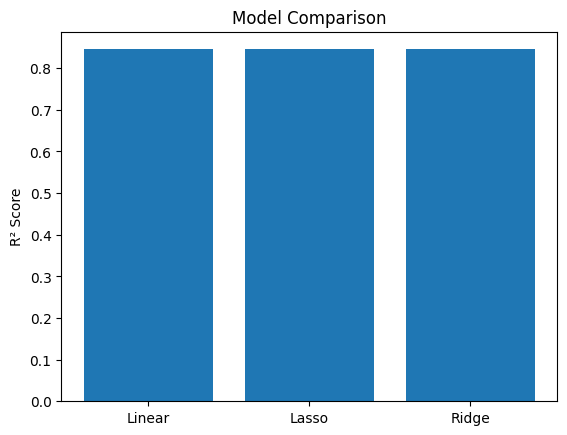

In [23]:
models = ['Linear', 'Lasso', 'Ridge']
scores = [basic_model_score, test_score, test_ridge_score]

plt.bar(models, scores)
plt.ylabel('R² Score')
plt.title('Model Comparison')
plt.show()
